Exercise 3.1

In [1]:
import itertools
from collections import Counter

# Known Ln values

Ln = {0: 0, 1: 1, 2: 4, 3: 51/8}

def compute_Pb(N, r1):
  counts = Counter()
  for a in itertools.product(range(r1), repeat=N):

      ctr = Counter(a)
      resolved = sum(1 for v in ctr.values() if v == 1)
      b = N - resolved
      counts[b] += 1
  total = r1**N
  P = {b: cnt/total for b, cnt in counts.items()}
  return P

Function to calculate L4 when r1 = 4, is possible to do this since, from the formula, we have the relation L4 = P0 * L0 + P2 * L2 + P3 * L3 + P4 * L4

In [2]:
N = 4
P4 = compute_Pb(N, 4)

A = sum(P4[b]*Ln[b] for b in P4 if b < 4)
P4_4 = P4.get(4, 0)
L4 = (4 + A) / (1 - P4_4)

results = {}
Ln[4] = L4

Calculating η as N/L for each possible value of r1

In [3]:
for r1 in range(1,7):
    P = compute_Pb(N, r1)
    L = r1 + sum(P[b]*Ln[b] for b in P)
    eta = N / L
    results[r1] = (round(eta,9))

import pandas as pd
df = pd.DataFrame.from_dict(results, orient='index', columns=['η'])
df.index.name = 'r1'
pd.set_option('display.float_format', '{:.9f}'.format)
print(df)



             η
r1            
1  0.407163054
2  0.416686762
3  0.446708284
4  0.453305352
5  0.442590301
6  0.422558938


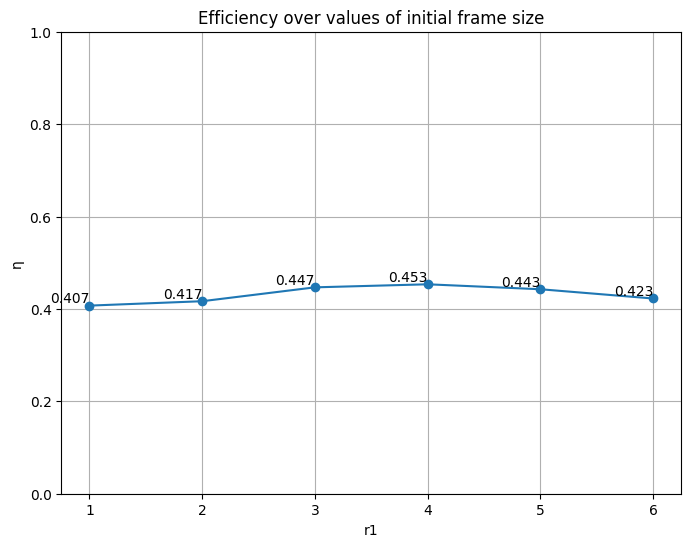

In [4]:
import matplotlib.pyplot as plt
import numpy as np


r1_values = df.index.values
eta_values = df['η'].values


plt.figure(figsize=(8, 6))
plt.plot(r1_values, eta_values, marker='o', linestyle='-')


plt.xlabel('r1')
plt.ylabel('η')


plt.title('Efficiency over values of initial frame size')


plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.2))

plt.grid(True)

for i, txt in enumerate(eta_values):
    plt.text(r1_values[i], eta_values[i], f'{txt:.3f}', ha='right', va='bottom')


plt.show()

We have the maximum value of η at r1 = 4, which is the number of tags to read N. This is a good trade-off between the number of tags and the efficiency of the reading process.